<a href="https://colab.research.google.com/github/priyankadeep/Advanced-Machine-Learning-Applications-in-Healthcare/blob/main/Advanced_Machine_Learning_Applications_in_Healthcare_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/dermatology -new.csv')
scaler = StandardScaler()


In [ ]:
y = df[['Disease']]
X = df[['Age']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test = scaler.transform(X_test)

In [ ]:
# Question 1.1: Gradient Descent

X_train = pd.concat((pd.DataFrame([1,358]* 179), df[['Age']]),axis=1, join='inner').to_numpy()
y_train = y.to_numpy()

def grad_descent(x, y, alpha, epsilon):
    iteration = [0]
    i = -1

    theta = np.ones(shape=(x.shape[1], 1))
   # theta = np.ones(shape=(len(df.columns), 1))
    cost = [np.transpose(x @ theta - y) @ (x @ theta - y)]
    delta = 1
    while(delta>epsilon):
        i += 1
        theta = theta - alpha*((np.transpose(x)) @ (x @ theta - y))
        cost_val = (np.transpose(x @ theta - y)) @ (x @ theta - y)
        cost.append(cost_val)
 #       print(cost[i], ", ", cost[i+1], ", ", delta)
        delta = abs(cost[i+1] - cost[i])
        if((cost[i+1] - cost[i]) > 0):
            print("The cost is increasing. Try reducing alpha.")
            break
        iteration.append(i)
    print("Completed in %d iterations." %(i))
    return(theta)
# Plot the cost function over iterations

# Using the gradient descent function in a scaled data
stheta  = grad_descent(x = preprocessing.scale(X_train), y = y_train, alpha = 0.001, epsilon = 10**-10)
print (stheta)
# cost = grad_descent(x = preprocessing.scale(X_train), y = y_train, alpha = 0.001, epsilon = 10**-10)
# iteration= grad_descent(x = preprocessing.scale(X_train), y = y_train, alpha = 0.001, epsilon = 10**-10)

# # Plot the cost function over iterations
# plt.plot(iteration, cost)
# plt.xlabel('Iterations')
# plt.ylabel('Cost Function')
# plt.title('Gradient Descent: Cost Function Convergence')
# plt.grid(True)
# plt.show()



Completed in 35 iterations.
[[-0.09886794]
 [-0.40586823]]


In [ ]:
# Question 1.2: Random Forest
# Convert categorical data into int representations of unique categories
for col in df.columns:
  labels, uniques = pd.factorize(df[col])
  df[col] = labels

In [ ]:
X_rf = df.drop(columns='Disease')
y_rf = df['Disease']
X_train_rf,X_test_rf,y_train_rf,y_test_rf = train_test_split(X_rf,y_rf,test_size=0.3)

In [ ]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train_rf, y_train_rf)

RandomForestClassifier(n_estimators=500)

In [ ]:
predictions_rf = rfc.predict(X_test_rf)
print(accuracy_score(y_test_rf, predictions_rf))
print(confusion_matrix(y_test_rf, predictions_rf))
print(classification_report(y_test_rf, predictions_rf))

0.9722222222222222
[[18  0  0  0  0  1]
 [ 0 34  0  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  0  0 11  0  0]
 [ 2  0  0  0 18  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        11
           4       1.00      0.90      0.95        20
           5       0.86      1.00      0.92         6

    accuracy                           0.97       108
   macro avg       0.96      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108



In [ ]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(rfc, X_train_rf, y_train_rf, cv=10)

# Calculate average accuracy
average_accuracy = cv_scores.mean()

print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.9800000000000001


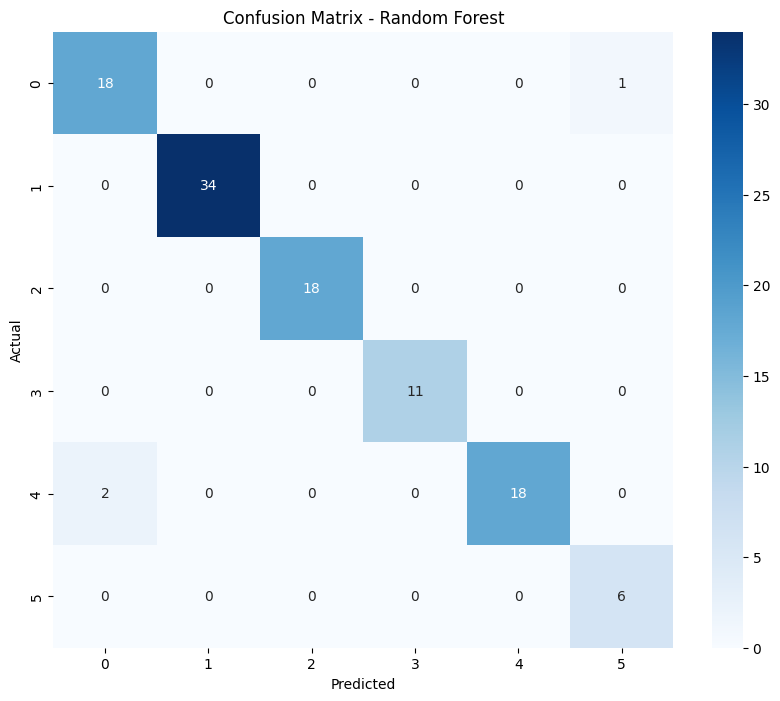

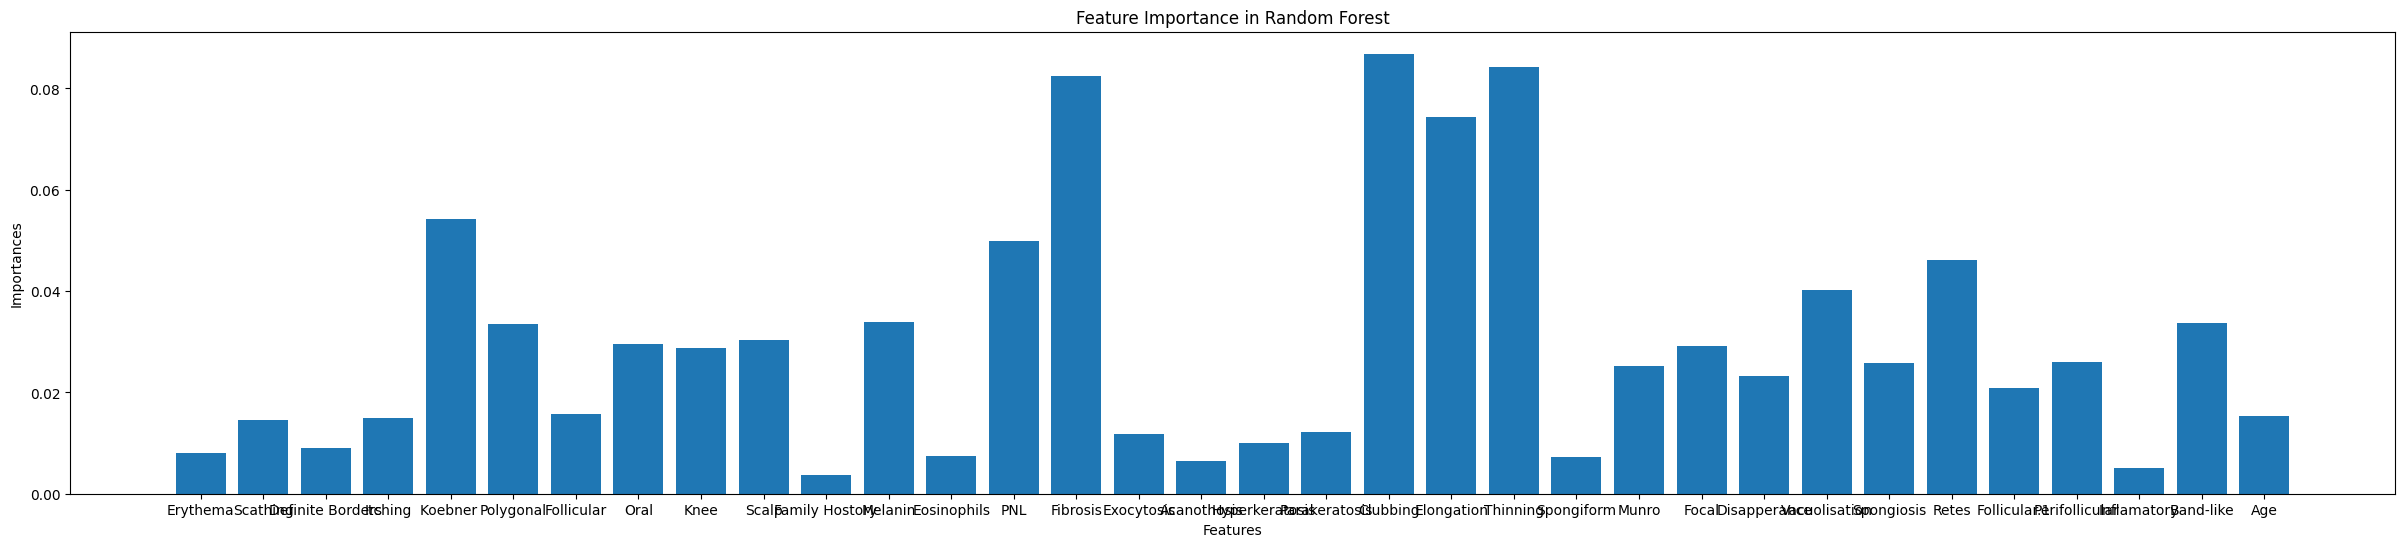

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test_rf, predictions_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_rf), yticklabels=np.unique(y_rf))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()



feat = rfc.feature_importances_
feat_names = X_train_rf.columns

# Plot feature importance
plt.figure(figsize = (30,6))
plt.bar(feat_names, feat)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importance in Random Forest")
plt.show()

In [ ]:
# Question 1.3: KNN Algorithm

X_knn = df.drop(columns='Disease')
y_knn = df['Disease']
X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(X_knn,y_knn,test_size=0.3)

In [ ]:
# Define the classifier using kNN function and train it
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Test the classifier by giving it test instances
prediction = classifier.predict(X_test_knn)

In [ ]:
# Count how many were correctly classified
correct = np.where(prediction==y_test_knn, 1, 0).sum()
print(correct)

79


In [ ]:
accuracy_knn = correct/len(y_test_knn)
print(accuracy_knn)

0.7314814814814815


In [ ]:
results = []

for k in range(1, 51, 2):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train_knn,y_train_knn)
  prediction = classifier.predict(X_test_knn)
  correct = np.where(prediction==y_test_knn, 1, 0).sum()
  accuracy_knn = correct/len(y_test_knn)
  print ("k=", k, " Accuracy=", accuracy_knn)
  results.append([k,accuracy_knn])

# Convert that series of tuples in a dataframe for easy plotting
results = pd.DataFrame(results, columns=["k","accuracy"])

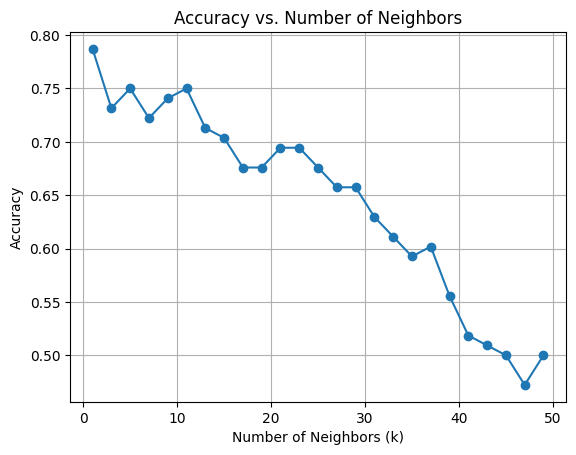

In [ ]:
plt.plot(results['k'], results['accuracy'], marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

In [ ]:
# Question 1.4: agglomerative method:

scaler = StandardScaler()
df_1 = scaler.fit_transform(df)


In [ ]:
linkage_matrix = sch.linkage(df_1, method='complete')

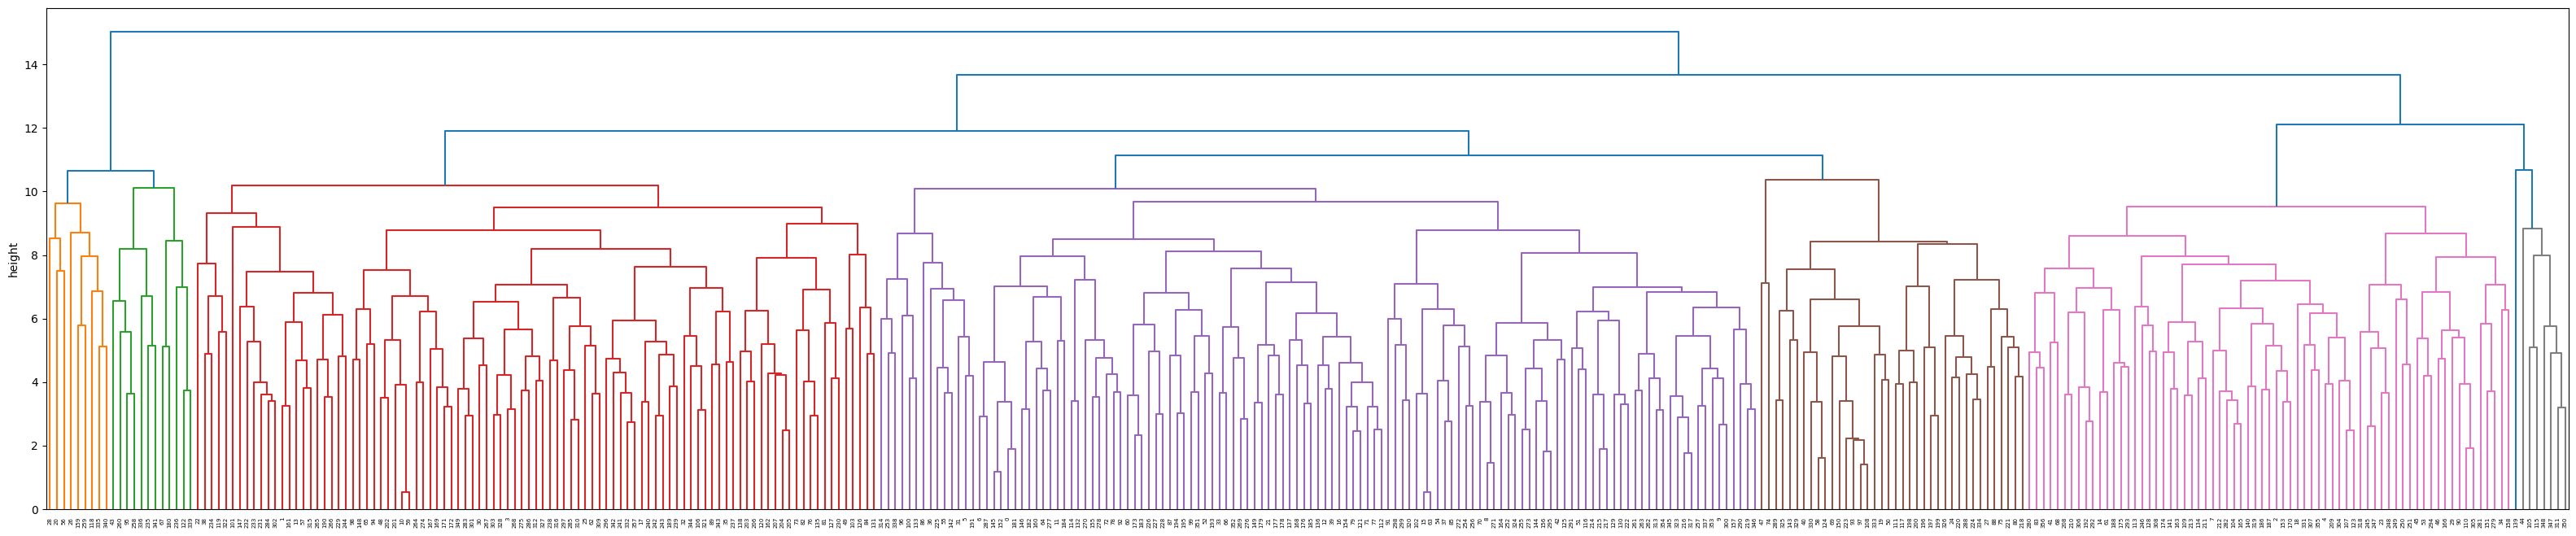

In [ ]:
# plot dendogram
plt.figure(figsize=(40, 8))
dendrogram = sch.dendrogram(linkage_matrix)
plt.ylabel('height')
plt.savefig('dendogram.png', dpi=300)

In [ ]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='complete')

In [ ]:
cluster_preds = cluster.fit_predict(df)
print(cluster_preds)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 4 0 4 1 4 4 4 4 4 4 4 1 4 0 4 1 2 2 0 1 1 0 0 2 4 2 1 1 1 0 2 4 4 0 2 0 4
 4 2 1 2 2 0 1 1 0 4 1 2 0 0 1 0 1 1 4 2 5 2 1 2 0 1 0 5 2 0 0 2 1 1 2 1 2
 5 2 4 2 5 0 4 5 1 2 0 1 0 0 5 1 1 0 2 0 2 5 3 1 4 1 4 5 2 2 1 4 2 1 1 0 2
 0 4 2 1 1 4 0 5 4 3 1 1 1 1 5 0 1 1 1 1 3 1 1 1 0 1 0 2 2 3 4 1 5 1 2 4 1
 0 0 0 2 1 4 1 4 0 0 0 1 2 4 4 1 1 1 4 0 2 0 5 2 1 3 2 0 0 1 4 1 0 1 2 2 1
 4 2 0 5 1 0 1 4 0 5 4 4 4 5 1 2 4 0 0 2 1 4 4 0 1 0 2 2 2 0 4 2 2 1 4 2 1
 4 1 4 4 4 1 1 4 2 1 2 5 0 1 2 1 1 3 1 1 1 2 2 2 0 2 0 0 1 2 2 5 4 2 2 0 0
 0 3 1 1 4 0 0 2 1 2 4 0 3 5 0 3 2 2 2 4 3 4 3 3 1 4 0 1 0 2 3 3 4 0 2 0 0
 3 0 3 5 4 1 1 1 5 2 3 1 1 3 2 3 1 3 1 2 2 2 2 0 4]


In [ ]:
print(accuracy_score(y_rf, cluster_preds))
print(confusion_matrix(y_rf, cluster_preds))

0.2430167597765363
[[19 22  8  3  5  3]
 [29 29 15  9 21  8]
 [20 18 18  4 11  0]
 [10 12 15  3  6  2]
 [ 5 16 12  0 13  2]
 [ 0 10  2  1  2  5]]


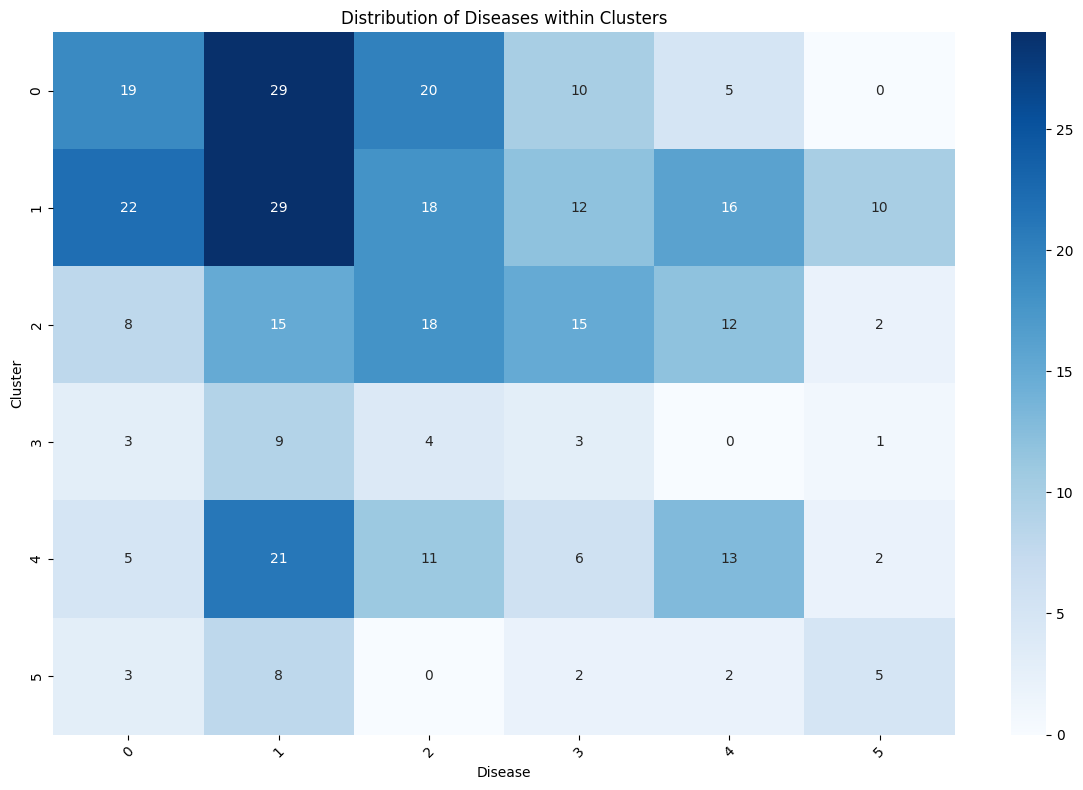

In [ ]:
df['Cluster'] = cluster_preds

# Count the number of occurrences of each disease within each cluster
cluster_disease_counts = df.groupby(['Cluster', 'Disease']).size().unstack(fill_value=0)

# Visualize the distribution of diseases within each cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_disease_counts, cmap='Blues', annot=True, fmt='g', cbar=True)
plt.title('Distribution of Diseases within Clusters')
plt.xlabel('Disease')
plt.ylabel('Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Question 1.4: divisive algo:

X_1 = df.iloc[:,0:33]


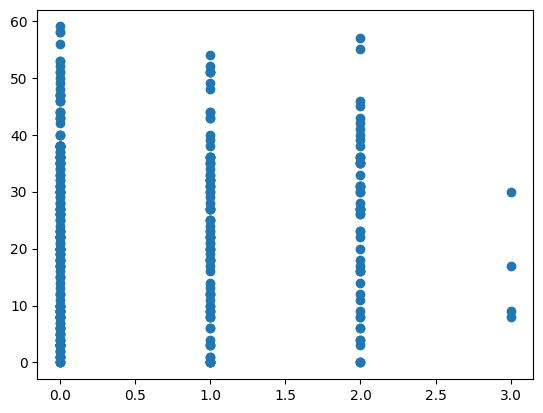

In [ ]:
x_1 = df.iloc[:,0]
y_1 = df.iloc[:,33]
plt.scatter(x_1,y_1)


In [ ]:
kmeans = KMeans(n_clusters=6)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Predict the clusters
y_kmeans = kmeans.fit_predict(X_1)
centroids = kmeans.cluster_centers_
# Calculate silhouette score
silhouette_avg = silhouette_score(X_1, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.15625639533254645


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


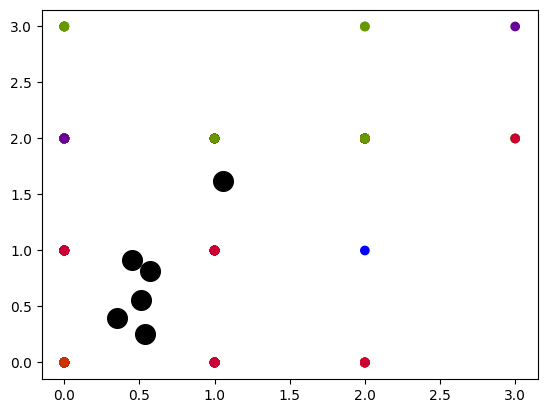

In [ ]:
# Plot the clusters
plt.scatter(X_1.iloc[:,0],X_1.iloc[:,1],c=kmeans.labels_,cmap='brg')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, c='black')

In [ ]:
print(accuracy_score(y_1, y_kmeans))
print(confusion_matrix(y_1, y_kmeans))

0.025139664804469275
[[4 0 6 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
